# Data Sourcing and Data Cleaning

In [55]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#To ignore warnings
warnings.filterwarnings('ignore')

#Data Sourcing
#reading the dataset in low memory set to false because data contains mixed data types
df= pd.read_csv("D:\\loan.csv", low_memory=False)

#Data Cleaning
#Including the columns which I planned to use which is having NA values
df['emp_length'].fillna("0 years", inplace=True)
#Dropping the columns having NA values
cleaned_df= df.dropna(axis=1)
#Standardizing the Annual Income data to 2 decimal values
cleaned_df['annual_inc']=cleaned_df['annual_inc'].round(2)
#Removing Outliers
Q1 = cleaned_df['annual_inc'].quantile(0.10)
Q3 = cleaned_df['annual_inc'].quantile(0.95)
IQR = Q3 - Q1 
threshold = 1.5
cleaned_df_no_outliers = cleaned_df[~((cleaned_df['annual_inc'] < (Q1 - threshold * IQR)) | (cleaned_df['annual_inc'] > (Q3 + threshold * IQR)))]
cleaned_df_no_outliers['int_rate'] = cleaned_df_no_outliers['int_rate'].str.rstrip('%').astype(float)


Before starting the analysis, Here I have listed the variables took into account for analysis. 

Columns for EDA (not as in the file)
1. Term
2. Interest Rate 
3. Grade 
4. SubGrade
5. Employment Length 
6. Home Ownership
7. Annual Income
8. Verification Status
9. Address State
10. Purpose
11. Open Account 
12. Total Account
13. Loan Status
14. Funded Amount
15. Funded Amount Investors
16. Loan Amount

# Univariate Analysis


Univariate Analysis

Analysis on Purpose - An Unordered Categorical Variable

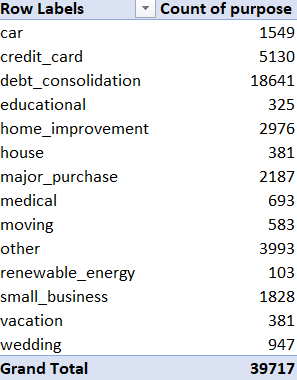

As we can see here, the main reason for borrowing the money is for debt_consolidation and the least for making their energy consumption as renewable_energy

Analysis on Address State - An Unordered Categorical Variable

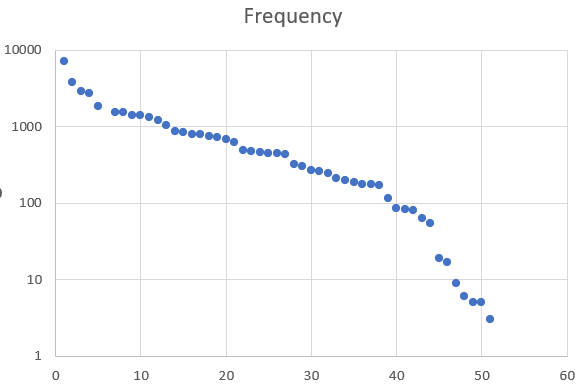

Here I have plotted a Scatter Plot for the Address State variable in terms of Rank (x-axis) and Frequency (y-axis). As per the Power Law Distribution, The Plot obeys it and there is no anomaly detected in the pattern.


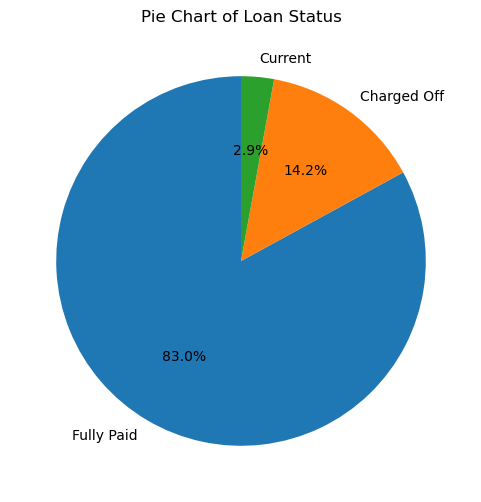

In [56]:
#Univariate Analysis
#Analysis on Loan Status
plt.figure(figsize=(6, 6))
loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Loan Status')
plt.show()



As we can see, Most of the borrowers paid the loan and some of them are currently paying the loan.

In [13]:
#Univariate Analysis
#Analysis on Annual Income - A Quantitative Variable (After removing the outliers)
mean_income = cleaned_df_no_outliers['annual_inc'].mean().round(2)
print("Mean Income - ",mean_income)
median_income =  cleaned_df_no_outliers['annual_inc'].median()
print("Median Income - ",median_income)


Mean Income -  66728.26
Median Income -  58947.0


From the above extracted data, we can see that the people having around 55 k to 70 k annual income likely to get a loan.
I have removed the outliers using Interquartile difference already.


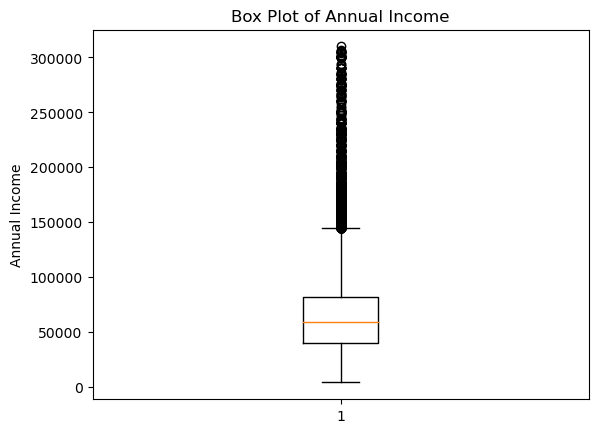

In [14]:
#Univariate Analysis
#Summary Metrics
#Box Plot on Annual Income
plt.boxplot(cleaned_df_no_outliers['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income')
plt.show()


The above BoxPlot shows the spread of Annual Income and we can see most of the borrowers are around 40k to 70k

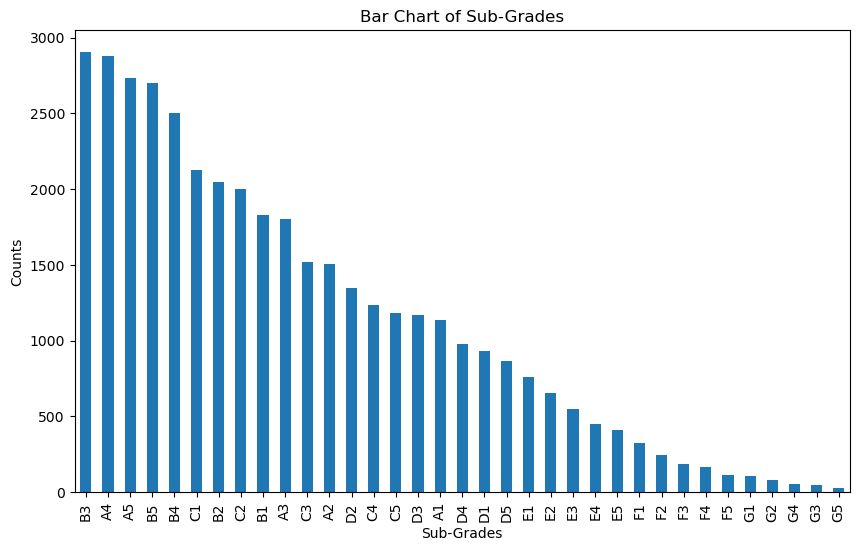

In [15]:
#Univariate Analysis
#Bar Chart on Sub Grades
SubGrade_Counts= cleaned_df_no_outliers['sub_grade'].value_counts()
plt.figure(figsize=(10, 6))
SubGrade_Counts.plot(kind='bar')
plt.xlabel('Sub-Grades')
plt.ylabel('Counts')
plt.title('Bar Chart of Sub-Grades')
plt.show()

As we can see, Most borrowers falls under sub grade of 'B3' and 'A4' and G5 sub grade has the least borrowers.

# Segmented Univariate Analysis

Segemented Univariate Analysis

Analysis on Annual Income across House Ownership

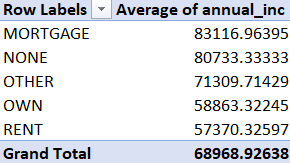

Here we can see that the average annual income of people who got mortgage property is more than that of who lives for rent.

Analysis on Annual Income across Employee Experience

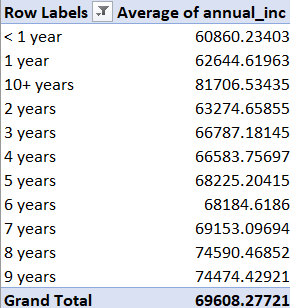

In this image, We can see as the experience increases , the annual income increases.

Analysis on Funded amount across Verification

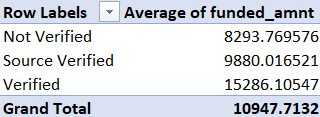

The Verified users are more likely to get more loan amount than the others.

Analysis on Loan Amount across Terms

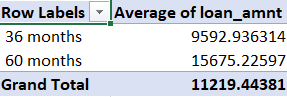

As we can see here, The more the term duration, more the loan amount

Analysis on Loan Amount, Funded Amount and Funded Amount Investors across Grades

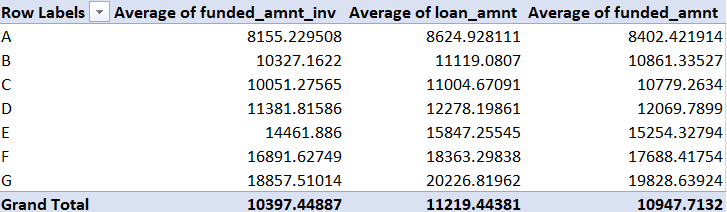

As we can see, The amounts are in the increasing order according to the grades from A to G but I can see a slight anomaly on Grade B and C.

# Bivariate Analysis


Note : I am leaving the Current loan status for comparing only Fully Paid and Defaulters. Current Status left for future purpose.

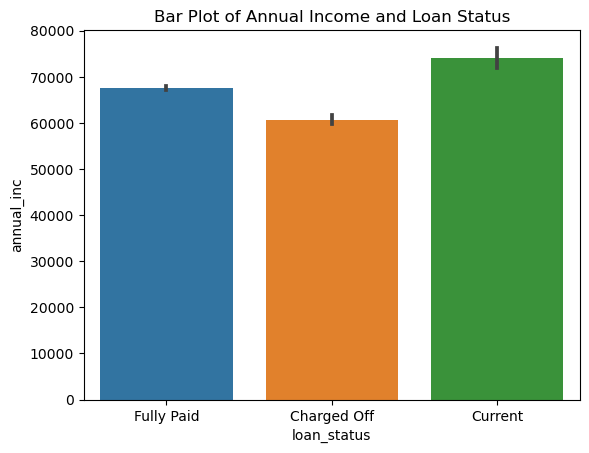

In [25]:
#Bivariate Analysis on Loan Status and Annual Income
sns.barplot(x='loan_status',y='annual_inc',data=cleaned_df_no_outliers)
plt.title('Bar Plot of Annual Income and Loan Status')
plt.show()

By comparing the annual incomes,the borrowers who has more annual income likely to repay the loan fully.

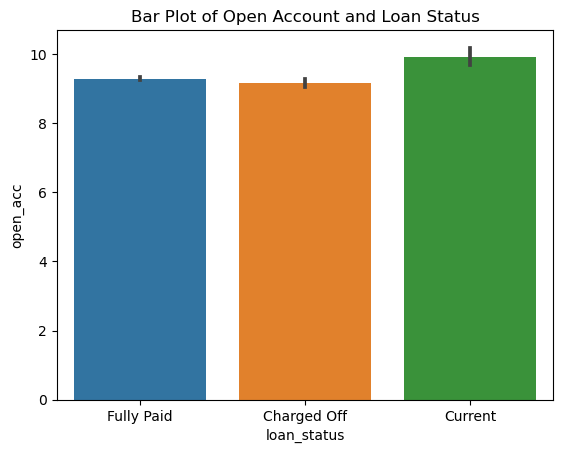

In [27]:
#Bivariate Analysis on Loan Status and Open Account
sns.barplot(x='loan_status',y='open_acc',data=cleaned_df_no_outliers)
plt.title('Bar Plot of Open Account and Loan Status')
plt.show()

By comparing, The borrowers who fully paid the loan and defaulted has most likely the same number of open credit lines.

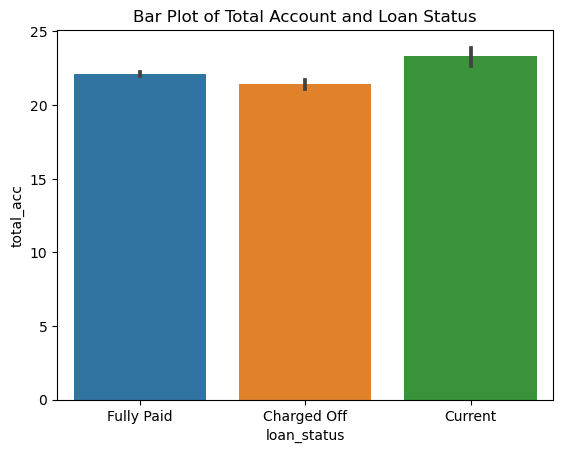

In [28]:
#Bivariate Analysis on Loan Status and Total Account
sns.barplot(x='loan_status',y='total_acc',data=cleaned_df_no_outliers)
plt.title('Bar Plot of Total Account and Loan Status')
plt.show()

By comparing, The borrowers who fully paid the loan has slightly having more total credit lines than Defaulters.

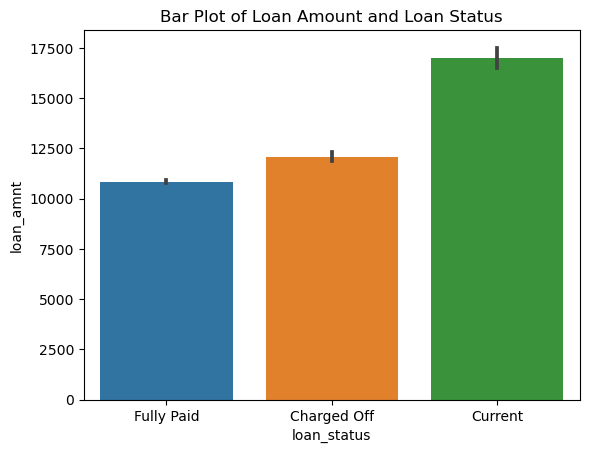

In [29]:
#Bivariate Analysis on Loan Status and Loan Amount
sns.barplot(x='loan_status',y='loan_amnt',data=cleaned_df_no_outliers)
plt.title('Bar Plot of Loan Amount and Loan Status')
plt.show()

By comparing, The fully paid borrowers likely to ask for less loan amount than the Defaulters.

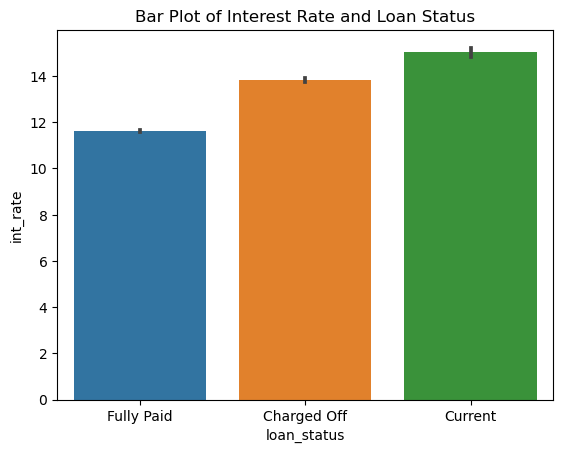

In [54]:
#Bivariate Analysis on Loan Status and Interest Rate
sns.barplot(x='loan_status',y='int_rate',data=cleaned_df_no_outliers)
plt.title('Bar Plot of Interest Rate and Loan Status')
plt.show()

By comparing, With Less Interest rates, the loan is more likely to be paid.

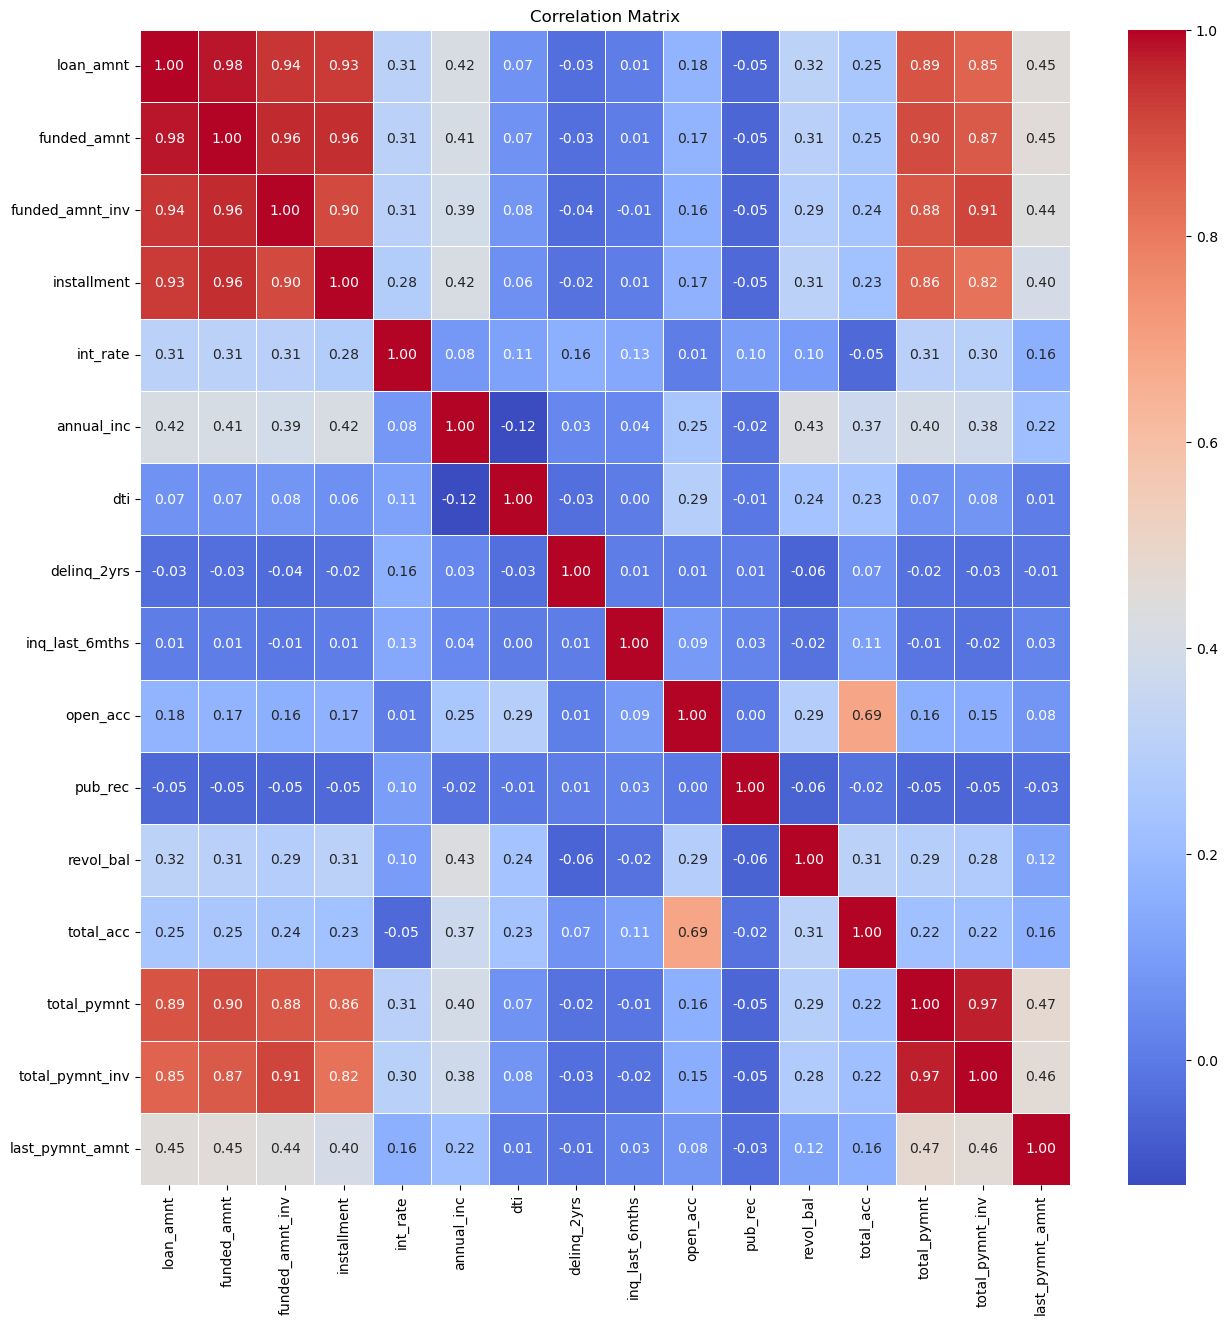

In [52]:
#Bivariate Analysis
#Finding Correlations
loan_correlation = cleaned_df_no_outliers[['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate',
                  'annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',	
                  'pub_rec','revol_bal','total_acc',	'total_pymnt','total_pymnt_inv',	
                  'last_pymnt_amnt']]
correlation = loan_correlation.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Here the loan amount is most correlated with the funded amount i.e., as the loan amount increases/decreases, the funded amount will increase/decrease. The DTI and the annual income are less correlated i.e., as the annual income increases, the DTI decreases and vice versa.

# Derived Metrics

In [60]:
#Adding a new Business driven column
bins = [5, 10, 20, 25]
labels = ['Low', 'Medium', 'High']
cleaned_df_no_outliers['int_rate_category'] = pd.cut(cleaned_df_no_outliers['int_rate'], bins=bins, labels=labels, right=False)
print(cleaned_df_no_outliers[['int_rate', 'int_rate_category']].to_string())

       int_rate int_rate_category
0         10.65            Medium
1         15.27            Medium
2         15.96            Medium
3         13.49            Medium
4         12.69            Medium
5          7.90               Low
6         15.96            Medium
7         18.64            Medium
8         21.28              High
9         12.69            Medium
10        14.65            Medium
11        12.69            Medium
12        13.49            Medium
13         9.91               Low
14        10.65            Medium
15        16.29            Medium
16        15.27            Medium
17         6.03               Low
18        11.71            Medium
19         6.03               Low
20        15.27            Medium
21        12.42            Medium
22        11.71            Medium
23        11.71            Medium
24        11.71            Medium
25         9.91               Low
26        14.27            Medium
27        16.77            Medium
28        11.7